In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

In [81]:
import warnings

In [89]:
warnings.simplefilter("ignore")

In [8]:
apple  = pd.read_csv('./data/pdata_AAPL_2005_2013.csv', index_col=0, parse_dates=True)
amazon = pd.read_csv('./data/pdata_AMZN_2005_2013.csv', index_col=0, parse_dates=True)
google = pd.read_csv('./data/pdata_GOOG_2005_2013.csv', index_col=0, parse_dates=True)

In [28]:
apple  = apple.sort_values(by=['Date'])
amazon = amazon.sort_values(by=['Date'])
google = google.sort_values(by=['Date'])

In [29]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close,log_return
Date,,,,,,,
2005-08-19,46.280001,46.700001,45.770000,45.830001,94142300,6.026547,NaN
2005-08-22,46.150002,46.749999,45.260001,45.869998,96933200,6.031806,0.0
2005-08-23,45.850001,46.100000,45.319999,45.739999,73901100,6.014712,0.0
2005-08-24,45.599999,47.120000,45.589999,45.770000,143017700,6.018657,0.0
2005-08-25,46.120001,46.489999,45.810000,46.059999,69063400,6.056791,0.0


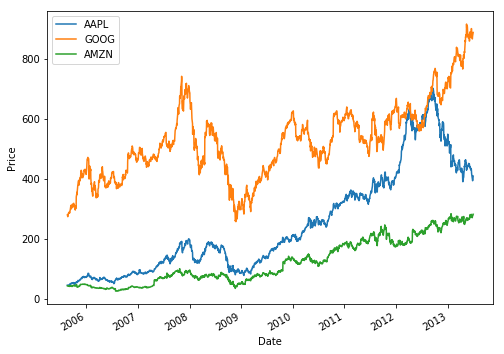

In [75]:
fig,ax = plt.subplots(figsize=(8,6))
apple['Close'].plot(ax=ax, label='AAPL')
google['Close'].plot(ax=ax, label='GOOG')
amazon['Close'].plot(ax=ax, label="AMZN")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()

In [55]:
apple['log_return'] = np.log(apple['Close']).diff()

In [57]:
apple['Close'][0], apple['Close'][1]

(45.830001, 45.869997999999995)

In [58]:
np.log(apple['Close'][1]/apple['Close'][0])

0.0008723446667958872

In [59]:
apple.log_return.head()

Date
2005-08-19         NaN
2005-08-22    0.000872
2005-08-23   -0.002838
2005-08-24    0.000656
2005-08-25    0.006316
Name: log_return, dtype: float64

In [76]:
x = np.linspace(-.15, .15, 500)

In [77]:
mu, sigma = scipy.stats.norm.fit(apple['log_return'].dropna())
mu, sigma

(0.0011068321404123214, 0.0233371312737251)

In [79]:
norm_fit = scipy.stats.norm.pdf(x, mu, sigma)

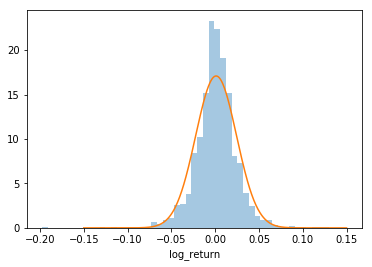

In [90]:
fig, ax = plt.subplots()
sns.distplot(apple['log_return'].dropna(), kde=False, norm_hist=True, label="AAPL", ax=ax)
plt.plot(x, norm_fit, label="Norm fit")

In [72]:
apple['log_return'].mean()

0.0011068321404123214

In [74]:
apple['log_return'].std()

0.0233430326851922